#  Transform your Pandas Dataframes: Styles, 🎨 Colors, and 😎 Emojis

In the following section of this article, we will explore a method to add colors and styles to Pandas DataFrames. Our focus will be on the application of colors and emojis, utilizing approaches similar to the popular conditional formatting commonly employed in pivot tables within spreadsheets. Through this strategy, we aim to enhance the presentation of our data, making the exploration and understanding of information not only informative but also visually appealing

---

<center>
<img src="img/pandas_tables.png" height="80%" width="80%">

image generated using [partyrock](https://partyrock.aws/)

</center>

----

# What is Pandas Style?
**Pandas Styler** is a great feature that allows to customize the appearance of DataFrames during visualization. This functionality grants users the ability to highlight, color, and format cells based on specific conditions, facilitating the visual identification of patterns and trends in the data. 
Therefore, Pandas Styler provides an intuitive and flexible interface for applying conditional styles, allowing users to enhance the readability of DataFrames and effectively emphasize key information. This capability not only elevates the visual appeal of the data but also contributes to a clearer and more comprehensible analysis of datasets.

---

<center>
<img src="img/pandas_style.jpg" height="80%" width="80%">
</center>

----

Next we have the code with we are going to create a pivot table using a set of data and from this you will begin to give it different styles and conditional formats such as can be seen in the previous image.

## 🟣 Pivot Tables

> The **pivot table** is a tabular data structure that provides a summarized overview of information from another table, organizing the data based on one variable and displaying values associated with another variable. In this specific scenario, the pivot table organizes the data according to the 'smoker' column and presents the total sum of tips, categorized by the days on which clients consume in the restaurant

---

### Example
The following example shows the `pivot_table` method with the 'tips' DataFrame

![](img/pivot_table.png)

---



`python code`

```python
import pandas as pd
import seaborn as sns

# create the tips dataframe 
data = sns.load_dataset('tips')
data_pivot = pd.pivot_table(data,
                    index='smoker',
                    columns='day',
                    values='total_bill',
                    aggfunc='sum').reset_index()
data_pivot

```

`ouput`

day |	smoker |	Thur |	Fri |	Sat	 | Sun      |
----|----------|---------|------|--------|----------|
0	| Yes	| 326.24 |	252.20	| 893.62 |	458.28  |
1	| No	| 770.09 |	73.68	| 884.78 |	1168.88 |



## 🟣 Dataframe: Apple Store apps

In this analysis, we will use the **'🍎 Apple Store apps'** DataFrame to explore the creation of pivot tables and customization of table styles. This dataset provides detailed insights into Apple App Store applications, covering aspects from app names to specifics like size, price, and ratings. Our objective is to efficiently break down the information while applying styles that enhance the presentation and comprehension of data effectively.

The dataset was downloaded from [Kaggle](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps) and it contains more than 7000 Apple iOS mobile application details. It is important to note that the data was collected in July 2017.

----

### Data Schema overview

column_name | column description
-----------|-----------------------------------|
track_name | the column contains the name of the app.|
size_bytes | the column contains the size of the app in bytes.|
currency | the column contains the currency type.|
price | the column contains the price of the app.|
rating_count_tot | the column contains the total number of ratings.|
rating_count_ver | the column contains the number of ratings for the current version of the app.|
user_rating | the column contains the average user rating for the app.|
user_rating_ver | the column contains the average user rating for the current version of the app.|
ver | the column contains the current version of the app.|
cont_rating | the column contains the content rating.|
prime_genre | the column contains the primary genre.|
sup_devices.num | the column contains the number of supported devices.|
ipadSc_urls.num | the column contains the number of screenshots showed for display.|
lang.num | the column contains the number of supported languages.|
vpp_lic | the column contains the Vpp Device Based Licensing Enabled.|

## 🟣 Create Dataframe
In the following code chunk, we will create a DataFrame by reading the CSV file.

In [91]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import warnings

# Deactivate pandas warning
warnings.filterwarnings('ignore')


print("Python Libraries version:")
print('--'*20)
print("Pandas version: ", pd.__version__)
print("Numpy version: ", np.__version__)
print("Matplotlib version: ", plt.matplotlib.__version__)

Python Libraries version:
----------------------------------------
Pandas version:  2.1.3
Numpy version:  1.26.1
Matplotlib version:  3.8.1


In [92]:
# Create a dataframe from a csv file
path='data/AppleStore.csv'
data =pd.read_csv(path,sep=';')
data.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


## 🟣 Pivot Table
In the next step, we are going to create a pivot table from a DataFrame.

In [93]:
# Pivot table

# filter the data to keep only the top 15 genres
top_genre = data.value_counts('prime_genre')[:15].index.tolist()
tmp = data.loc[data['prime_genre'].isin(top_genre),['prime_genre','user_rating','price']]

# create a new column with the rating rounded to the nearest integer
tmp['user_rating'] = [f'rating_{str(math.trunc(item))}' for item in  tmp['user_rating']]

# create a pivot table
tmp_pivot = (
        pd.pivot_table(
            data = tmp,
            columns='user_rating',
            index='prime_genre',
            values='price',
            aggfunc='mean',
            fill_value=0
            ).reset_index().round(2)
)
# rename the columns
tmp_pivot.columns.name=''
# print the pivot table
tmp_pivot

,prime_genre,rating_0,rating_1,rating_2,rating_3,rating_4,rating_5
0,Book,0.49,0.00,5.32,1.66,3.04,1.92
1,Education,3.42,1.79,1.95,2.32,5.20,3.12
2,Entertainment,0.51,1.99,0.78,0.90,0.95,1.03
3,Finance,0.30,0.00,0.00,0.73,0.53,0.50
4,Games,0.85,0.84,1.21,1.71,1.52,1.29
5,Health & Fitness,1.33,3.24,1.50,1.21,2.15,1.83
6,Lifestyle,0.29,1.27,0.81,0.90,1.08,1.37
7,Music,2.74,0.00,0.00,2.08,5.27,13.16
8,Photo & Video,0.75,0.74,1.36,2.16,1.47,1.33
9,Productivity,0.66,2.49,0.99,4.90,4.73,2.61


## 🟣 Styling with Pandas

Now we will explore the `style` module in Pandas, that enables us to enhance the visual presentation of DataFrames. The `style` module provides a differents of options to modify the appearance of the data, allowing us to customize aspects such as:

- **Coloring Cells:** Apply different colors based on cell values or conditions.
- **Highlighting:** Emphasize specific rows, columns, or values.
- **Formatting:** Adjust the format of the displayed values, including precision and alignment.
- **Bar Charts:** Represent data with horizontal or vertical bar charts within cells.
  


### 🎨 Styling: Setting Background Color for Headers

In [94]:
# Styling: Changing Background Color for Column Headers
headers = {
    'selector': 'th.col_heading',
    'props': 'background-color: #5E17EB; color: white;'
}

index_style = {
    'selector': 'th.index_name',
    'props': 'background-color: #5E17EB; color: white;'
}

tmp_pivot_style = (
    tmp_pivot
        .style
            .set_table_styles([headers,index_style])
            .set_properties(**{'background-color': '#ECE3FF','color': 'black'})
)

tmp_pivot_style


,prime_genre,rating_0,rating_1,rating_2,rating_3,rating_4,rating_5
0,Book,0.490000,0.000000,5.320000,1.660000,3.040000,1.920000
1,Education,3.420000,1.790000,1.950000,2.320000,5.200000,3.120000
2,Entertainment,0.510000,1.990000,0.780000,0.900000,0.950000,1.030000
3,Finance,0.300000,0.000000,0.000000,0.730000,0.530000,0.500000
4,Games,0.850000,0.840000,1.210000,1.710000,1.520000,1.290000
5,Health & Fitness,1.330000,3.240000,1.500000,1.210000,2.150000,1.830000
6,Lifestyle,0.290000,1.270000,0.810000,0.900000,1.080000,1.370000
7,Music,2.740000,0.000000,0.000000,2.080000,5.270000,13.160000
8,Photo & Video,0.750000,0.740000,1.360000,2.160000,1.470000,1.330000
9,Productivity,0.660000,2.490000,0.990000,4.900000,4.730000,2.610000


### 🎨 Style: Setting the background color for a particular cell

In following code snippet illustrates how to set a custom background color for a particular cell in our DataFrame using pandas styling.

In [95]:
(
    tmp_pivot
        .style
            .set_table_styles([headers, index_style])
            .set_properties(**{'background-color': '#ECE3FF', 'color': 'black'})
            .set_properties(**{'background-color': '#FD636B', 'color': 'white'},subset=pd.IndexSlice[4, 'rating_5'])
)


,prime_genre,rating_0,rating_1,rating_2,rating_3,rating_4,rating_5
0,Book,0.490000,0.000000,5.320000,1.660000,3.040000,1.920000
1,Education,3.420000,1.790000,1.950000,2.320000,5.200000,3.120000
2,Entertainment,0.510000,1.990000,0.780000,0.900000,0.950000,1.030000
3,Finance,0.300000,0.000000,0.000000,0.730000,0.530000,0.500000
4,Games,0.850000,0.840000,1.210000,1.710000,1.520000,1.290000
5,Health & Fitness,1.330000,3.240000,1.500000,1.210000,2.150000,1.830000
6,Lifestyle,0.290000,1.270000,0.810000,0.900000,1.080000,1.370000
7,Music,2.740000,0.000000,0.000000,2.080000,5.270000,13.160000
8,Photo & Video,0.750000,0.740000,1.360000,2.160000,1.470000,1.330000
9,Productivity,0.660000,2.490000,0.990000,4.900000,4.730000,2.610000


### 🎨 Style: Setting the background color for max/min values in the dataframe

Now, we will focus on highlighting the maximum and minimum values in our DataFrame. For this reason, we will assign distinctive background colors to these extreme values, facilitating a quicker and more intuitive understanding of the dataset. The code snippet below demonstrates how to implement this stylistic enhancement.

In [96]:
# select the columns that start with 'rating_'
columns = tmp_pivot.columns[tmp_pivot.columns.str.startswith('rating_')]

# get the max and min values
max_value = tmp_pivot[columns].max().max()
min_value = tmp_pivot[columns].min().min()

# Establecer el estilo para la celda con el valor máximo
max_style = f'border: 4px solid #3BE8B0 !important;'

# Establecer el estilo para la celda con el valor mínimo
min_style = f'background-color: #FF66C4; '

(
    tmp_pivot
        .style
            .set_table_styles([headers, index_style])
            .set_properties(**{'background-color': '#ECE3FF', 'color': 'black'})
            .set_properties(**{'background-color': '#FD636B', 'color': 'white'}, subset=pd.IndexSlice[4, 'rating_5'])
            .applymap(lambda x: max_style if x == max_value else '')
            .applymap(lambda x: min_style if x == min_value else '', subset=columns)
)


,prime_genre,rating_0,rating_1,rating_2,rating_3,rating_4,rating_5
0,Book,0.490000,0.000000,5.320000,1.660000,3.040000,1.920000
1,Education,3.420000,1.790000,1.950000,2.320000,5.200000,3.120000
2,Entertainment,0.510000,1.990000,0.780000,0.900000,0.950000,1.030000
3,Finance,0.300000,0.000000,0.000000,0.730000,0.530000,0.500000
4,Games,0.850000,0.840000,1.210000,1.710000,1.520000,1.290000
5,Health & Fitness,1.330000,3.240000,1.500000,1.210000,2.150000,1.830000
6,Lifestyle,0.290000,1.270000,0.810000,0.900000,1.080000,1.370000
7,Music,2.740000,0.000000,0.000000,2.080000,5.270000,13.160000
8,Photo & Video,0.750000,0.740000,1.360000,2.160000,1.470000,1.330000
9,Productivity,0.660000,2.490000,0.990000,4.900000,4.730000,2.610000


### 🎨 Style: Color Background Gradients

In the upcoming section, we will delve into the concept of color maps, representing a spectrum of colors arranged in a gradient. A colormap, essentially a palette of colors, consists of distinctive denominations, with the most popular ones being **['viridis,' 'magma,' 'Greens,' 'Reds']**.

The primary objective behind creating these color spectrums is to enhance the visual representation of data. Each color in the gradient carries specific nuances, contributing to a more nuanced  data visualization experience. 

For an extensive array of color options, you can explore the [matplotlib colormaps](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) link.

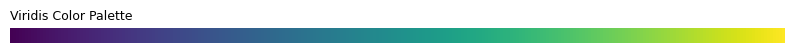

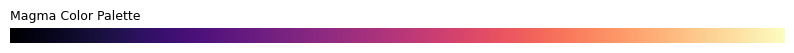

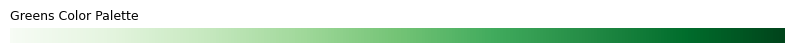

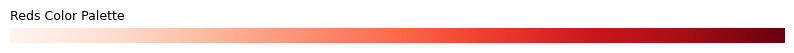

In [97]:
import matplotlib.pyplot as plt
import numpy as np

# Define the colormap
for cmap_item in ['viridis', 'magma','Greens','Reds']:
    cmap = plt.get_cmap(cmap_item)
    # Create a color gradient
    gradient = np.linspace(0, 1, 256).reshape(1, -1)

    # Display the color palette
    plt.figure(figsize=(10, 0.2))
    plt.imshow(gradient, aspect='auto', cmap=cmap)
    plt.axis('off')
    plt.title(f'{cmap_item.capitalize()} Color Palette', loc='left', fontsize=9)
    plt.show()


> #### Viridis palette
> Now, we will apply a color gradient to our pivot table, allowing you to observe how it is colored using the Viridis palette. In this context, lighter colors signify larger values within the distribution, while darker shades correspond to smaller values in the distribution. This approach provides a visual representation that intuitively conveys the magnitude of the data, making it easier to discern patterns and variations across the dataset.

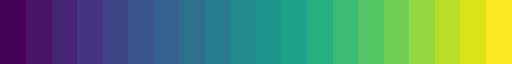

In [98]:
plt.get_cmap('viridis',lut=20)

In [99]:
(
    tmp_pivot
        .style
            .set_table_styles([headers, index_style])
            .background_gradient(cmap='viridis',subset=columns)
)

,prime_genre,rating_0,rating_1,rating_2,rating_3,rating_4,rating_5
0,Book,0.490000,0.000000,5.320000,1.660000,3.040000,1.920000
1,Education,3.420000,1.790000,1.950000,2.320000,5.200000,3.120000
2,Entertainment,0.510000,1.990000,0.780000,0.900000,0.950000,1.030000
3,Finance,0.300000,0.000000,0.000000,0.730000,0.530000,0.500000
4,Games,0.850000,0.840000,1.210000,1.710000,1.520000,1.290000
5,Health & Fitness,1.330000,3.240000,1.500000,1.210000,2.150000,1.830000
6,Lifestyle,0.290000,1.270000,0.810000,0.900000,1.080000,1.370000
7,Music,2.740000,0.000000,0.000000,2.080000,5.270000,13.160000
8,Photo & Video,0.750000,0.740000,1.360000,2.160000,1.470000,1.330000
9,Productivity,0.660000,2.490000,0.990000,4.900000,4.730000,2.610000


### 🎨 Style: Color Background in columns

In the next code chunk, we will enhance the visual representation of our pivot table by introducing distinct color backgrounds to specific columns. This technique aids in better highlighting and categorizing data, making it easier to draw insights from the table.

In [101]:
(
    tmp_pivot
        .style
            .set_table_styles([headers, index_style])
            .set_properties(**{'background-color': '#FFCFC9','color':'black'},subset=['rating_0','rating_1'])
            .set_properties(**{'background-color': '#FFF1B0','color':'black'},subset=['rating_2','rating_3'])
            .set_properties(**{'background-color': '#BEEAE5','color':'black'},subset=['rating_4','rating_5'])
)

,prime_genre,rating_0,rating_1,rating_2,rating_3,rating_4,rating_5
0,Book,0.490000,0.000000,5.320000,1.660000,3.040000,1.920000
1,Education,3.420000,1.790000,1.950000,2.320000,5.200000,3.120000
2,Entertainment,0.510000,1.990000,0.780000,0.900000,0.950000,1.030000
3,Finance,0.300000,0.000000,0.000000,0.730000,0.530000,0.500000
4,Games,0.850000,0.840000,1.210000,1.710000,1.520000,1.290000
5,Health & Fitness,1.330000,3.240000,1.500000,1.210000,2.150000,1.830000
6,Lifestyle,0.290000,1.270000,0.810000,0.900000,1.080000,1.370000
7,Music,2.740000,0.000000,0.000000,2.080000,5.270000,13.160000
8,Photo & Video,0.750000,0.740000,1.360000,2.160000,1.470000,1.330000
9,Productivity,0.660000,2.490000,0.990000,4.900000,4.730000,2.610000


### 🎨 Style: Color Bar

In this section, we will implement the style.bar function to introduce a dynamic color bar into our DataFrame. The color bar provides a visual representation of data values, assigning varying colors to different data ranges. 

In [102]:
(
    tmp_pivot
        .style
            .set_table_styles([headers, index_style])
            .set_properties(**{'background-color': '#ECE3FF', 'color': 'black'})
            .set_properties(**{'background-color': 'white','color':'black'},subset=columns)
            .bar(color='#FFCFC9',subset=['rating_0','rating_1'])
            .bar(color='#FFF1B0',subset=['rating_2','rating_3'])
            .bar(color='#BEEAE5',subset=['rating_4','rating_5'])
 )

,prime_genre,rating_0,rating_1,rating_2,rating_3,rating_4,rating_5
0,Book,0.490000,0.000000,5.320000,1.660000,3.040000,1.920000
1,Education,3.420000,1.790000,1.950000,2.320000,5.200000,3.120000
2,Entertainment,0.510000,1.990000,0.780000,0.900000,0.950000,1.030000
3,Finance,0.300000,0.000000,0.000000,0.730000,0.530000,0.500000
4,Games,0.850000,0.840000,1.210000,1.710000,1.520000,1.290000
5,Health & Fitness,1.330000,3.240000,1.500000,1.210000,2.150000,1.830000
6,Lifestyle,0.290000,1.270000,0.810000,0.900000,1.080000,1.370000
7,Music,2.740000,0.000000,0.000000,2.080000,5.270000,13.160000
8,Photo & Video,0.750000,0.740000,1.360000,2.160000,1.470000,1.330000
9,Productivity,0.660000,2.490000,0.990000,4.900000,4.730000,2.610000


### 🎨 Style: Image in Columns

In this section, we explore the enhancement of data representation by adding an image to an additional column. This approach provides an alternative method to elevate the visual impact of the data being presented. These images can serve as icons, represent brands, or convey additional visual elements to captivate and engage the audience.

In [103]:
# create a function to add an image to the dataframe depending on the genre
def add_image(image_name):
    img_url = f"img/icons/img_{image_name}.png"
    width   = "width: 50px"
    height  = "height: 50px"
    text_align ="center"
    return f'{width};{height}; content: url({img_url}); text-align:{text_align}'

# apply the function to the dataframe
styled_df = (
    tmp_pivot
        .head(5)
        .reset_index()
        .rename({'index': 'genre'}, axis=1)
        .style.applymap(add_image, subset=pd.IndexSlice[:, ['genre']])
        .set_table_styles([headers, index_style])
        .set_properties(**{'background-color': '#ECE3FF', 'color': 'black'})
)

# display the dataframe with the images
display(styled_df)


,genre,prime_genre,rating_0,rating_1,rating_2,rating_3,rating_4,rating_5
0,0,Book,0.490000,0.000000,5.320000,1.660000,3.040000,1.920000
1,1,Education,3.420000,1.790000,1.950000,2.320000,5.200000,3.120000
2,2,Entertainment,0.510000,1.990000,0.780000,0.900000,0.950000,1.030000
3,3,Finance,0.300000,0.000000,0.000000,0.730000,0.530000,0.500000
4,4,Games,0.850000,0.840000,1.210000,1.710000,1.520000,1.290000


> **Disclaimer: Issues with Notebook Cache**
> 
> During the creation of this content, I encountered difficulties related to the notebook cache. Despite making changes to the images, the visualization did not update correctly. Even after attempting to restart the kernel and clear the cell output, the problem persisted. The only effective solution I found was to change the file names of the images, thus avoiding unexpected cache behavior.
> 
> It's important to note that these issues may be specific to the Jupyter Notebooks environment and may not reflect inherent limitations in the code or libraries used. While I tried to address this problem, I did not find a complete solution and opted for an alternative fix by changing the file names.
> 
> I appreciate your understanding and patience. If you have suggestions or additional solutions, I would be delighted to learn and improve this process.

---

### 🎨 Style: Emoji Representation Based on Percentile Values

In this section, we delve into the creative use of emojis based on percentile values, offering a distinctive approach to elevate data representation. By incorporating diverse emojis, we enhance the visual impact of the data. Specifically, we employ circles and squads as emojis to bring nuanced expressions to our data points.

We have two functions have been created to accomplish this, one function operates on columns, while the other operates on rows. This functionality recreate the conditional formatting features found in spreadsheet applications.

In [104]:
def get_percentiles(row_data, bins=3, emoji='circle'):
    emoji_labels = {
        'circle': {3: ['🔴', '🟡', '🟢'], 
                   4: ['🔴', '🟠', '🟡', '🟢']},
        'squad': {3: ['🟥', '🟨', '🟩'], 
                  4: ['🟥', '🟨', '🟧', '🟩']}
    }

    if emoji in ['max', 'min', 'min_max']:
        return create_series(row_data, emoji)
    elif emoji in emoji_labels and bins in emoji_labels[emoji]:
        labels = emoji_labels[emoji][bins]
        return pd.cut(row_data, bins=len(labels), labels=labels, ordered=False)
    else:
        return row_data

def create_series(row_data, emoji):
    if emoji == 'max':
        return pd.Series(['🟩' if item == row_data.max() else '⬜' for item in row_data])
    elif emoji == 'min':
        return pd.Series(['🟥' if item == row_data.min() else '⬜' for item in row_data])
    elif emoji == 'min_max':
        return pd.Series(['🟥' if item == row_data.min() else '🟩' if item == row_data.max() else '⬜' for item in row_data])

def get_conditional_table_column(data, bins=3, emoji='circle'):
    tmp = data.copy()
    for column in data.columns:
        if pd.api.types.is_numeric_dtype(data[column]):
            row_data_emoji = get_percentiles(data[column], bins, emoji).astype(str)
            tmp[column] = data[column].astype(str) + ' ' + row_data_emoji
    return tmp

def get_conditional_table_row(data, bins=3, emoji='circle'):
    response_values = []
    column_str = [item for item in data.columns if data[item].dtypes not in ['int64', 'float64']]
    columns_num = [item for item in data.columns if data[item].dtypes in ['int64', 'float64']]

    for row in range(data.shape[0]):
        row_data = data.loc[row, columns_num]
        percentil = get_percentiles(row_data, bins, emoji)
        row_data = row_data.apply(lambda x: '{:.2f}'.format(x))
        percentil_values = [str(row_data[item]) + ' ' + percentil[item] for item in range(percentil.shape[0])]
        response_values.append(percentil_values)

    result_df = pd.DataFrame(response_values).round(2)
    result_df.columns = columns_num
    result_df = pd.concat([data[column_str], result_df], axis=1)
    return result_df

In [105]:
# get conditional table by column with 3 bins 
get_conditional_table_row(data=tmp_pivot,emoji='min_max')

,prime_genre,rating_0,rating_1,rating_2,rating_3,rating_4,rating_5
0,Book,0.49 ⬜,0.00 🟥,5.32 🟩,1.66 ⬜,3.04 ⬜,1.92 ⬜
1,Education,3.42 ⬜,1.79 🟥,1.95 ⬜,2.32 ⬜,5.20 🟩,3.12 ⬜
2,Entertainment,0.51 🟥,1.99 🟩,0.78 ⬜,0.90 ⬜,0.95 ⬜,1.03 ⬜
3,Finance,0.30 ⬜,0.00 🟥,0.00 🟥,0.73 🟩,0.53 ⬜,0.50 ⬜
4,Games,0.85 ⬜,0.84 🟥,1.21 ⬜,1.71 🟩,1.52 ⬜,1.29 ⬜
5,Health & Fitness,1.33 ⬜,3.24 🟩,1.50 ⬜,1.21 🟥,2.15 ⬜,1.83 ⬜
6,Lifestyle,0.29 🟥,1.27 ⬜,0.81 ⬜,0.90 ⬜,1.08 ⬜,1.37 🟩
7,Music,2.74 ⬜,0.00 🟥,0.00 🟥,2.08 ⬜,5.27 ⬜,13.16 🟩
8,Photo & Video,0.75 ⬜,0.74 🟥,1.36 ⬜,2.16 🟩,1.47 ⬜,1.33 ⬜
9,Productivity,0.66 🟥,2.49 ⬜,0.99 ⬜,4.90 🟩,4.73 ⬜,2.61 ⬜


In [109]:
# get conditional table by column using the min value 
get_conditional_table_column(data=tmp_pivot,emoji='min')

,prime_genre,rating_0,rating_1,rating_2,rating_3,rating_4,rating_5
0,Book,0.49 ⬜,0.0 🟥,5.32 ⬜,1.66 ⬜,3.04 ⬜,1.92 ⬜
1,Education,3.42 ⬜,1.79 ⬜,1.95 ⬜,2.32 ⬜,5.2 ⬜,3.12 ⬜
2,Entertainment,0.51 ⬜,1.99 ⬜,0.78 ⬜,0.9 ⬜,0.95 ⬜,1.03 ⬜
3,Finance,0.3 ⬜,0.0 🟥,0.0 🟥,0.73 ⬜,0.53 ⬜,0.5 ⬜
4,Games,0.85 ⬜,0.84 ⬜,1.21 ⬜,1.71 ⬜,1.52 ⬜,1.29 ⬜
5,Health & Fitness,1.33 ⬜,3.24 ⬜,1.5 ⬜,1.21 ⬜,2.15 ⬜,1.83 ⬜
6,Lifestyle,0.29 ⬜,1.27 ⬜,0.81 ⬜,0.9 ⬜,1.08 ⬜,1.37 ⬜
7,Music,2.74 ⬜,0.0 🟥,0.0 🟥,2.08 ⬜,5.27 ⬜,13.16 ⬜
8,Photo & Video,0.75 ⬜,0.74 ⬜,1.36 ⬜,2.16 ⬜,1.47 ⬜,1.33 ⬜
9,Productivity,0.66 ⬜,2.49 ⬜,0.99 ⬜,4.9 ⬜,4.73 ⬜,2.61 ⬜


In [107]:
# get conditional table by column using the max value
get_conditional_table_column(data=tmp_pivot,emoji='max')

,prime_genre,rating_0,rating_1,rating_2,rating_3,rating_4,rating_5
0,Book,0.49 ⬜,0.0 ⬜,5.32 🟩,1.66 ⬜,3.04 ⬜,1.92 ⬜
1,Education,3.42 🟩,1.79 ⬜,1.95 ⬜,2.32 ⬜,5.2 ⬜,3.12 ⬜
2,Entertainment,0.51 ⬜,1.99 ⬜,0.78 ⬜,0.9 ⬜,0.95 ⬜,1.03 ⬜
3,Finance,0.3 ⬜,0.0 ⬜,0.0 ⬜,0.73 ⬜,0.53 ⬜,0.5 ⬜
4,Games,0.85 ⬜,0.84 ⬜,1.21 ⬜,1.71 ⬜,1.52 ⬜,1.29 ⬜
5,Health & Fitness,1.33 ⬜,3.24 🟩,1.5 ⬜,1.21 ⬜,2.15 ⬜,1.83 ⬜
6,Lifestyle,0.29 ⬜,1.27 ⬜,0.81 ⬜,0.9 ⬜,1.08 ⬜,1.37 ⬜
7,Music,2.74 ⬜,0.0 ⬜,0.0 ⬜,2.08 ⬜,5.27 🟩,13.16 🟩
8,Photo & Video,0.75 ⬜,0.74 ⬜,1.36 ⬜,2.16 ⬜,1.47 ⬜,1.33 ⬜
9,Productivity,0.66 ⬜,2.49 ⬜,0.99 ⬜,4.9 🟩,4.73 ⬜,2.61 ⬜


In [110]:
# get conditional table by column using the circle emoji with 4 bins
get_conditional_table_column(data=tmp_pivot,emoji='circle',bins=4)

,prime_genre,rating_0,rating_1,rating_2,rating_3,rating_4,rating_5
0,Book,0.49 🔴,0.0 🔴,5.32 🟢,1.66 🟠,3.04 🟡,1.92 🔴
1,Education,3.42 🟢,1.79 🟡,1.95 🟠,2.32 🟠,5.2 🟢,3.12 🔴
2,Entertainment,0.51 🔴,1.99 🟡,0.78 🔴,0.9 🔴,0.95 🔴,1.03 🔴
3,Finance,0.3 🔴,0.0 🔴,0.0 🔴,0.73 🔴,0.53 🔴,0.5 🔴
4,Games,0.85 🔴,0.84 🟠,1.21 🔴,1.71 🟠,1.52 🟠,1.29 🔴
5,Health & Fitness,1.33 🟠,3.24 🟢,1.5 🟠,1.21 🔴,2.15 🟠,1.83 🔴
6,Lifestyle,0.29 🔴,1.27 🟠,0.81 🔴,0.9 🔴,1.08 🔴,1.37 🔴
7,Music,2.74 🟢,0.0 🔴,0.0 🔴,2.08 🟠,5.27 🟢,13.16 🟢
8,Photo & Video,0.75 🔴,0.74 🔴,1.36 🟠,2.16 🟠,1.47 🟠,1.33 🔴
9,Productivity,0.66 🔴,2.49 🟢,0.99 🔴,4.9 🟢,4.73 🟢,2.61 🔴


## 📚 References
If you want to learn...
* [🐼 Pandas Style Documentation](https://pandas.pydata.org/docs/user_guide/style.html)